In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_152.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_132.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_096.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_010.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_117.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_119.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_049.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_023.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_064.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot/lasio_128.jpg
/kaggle/input/mangofruitdds/MangoFruitDDS/SenMango

## Training on imges with original background

In [4]:
# Directory with our training horse pictures
a_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Alternaria')

# Directory with our training human pictures
b_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Anthracnose')

# Directory with our training horse pictures
c_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Black Mould Rot')

# Directory with our training human pictures
d_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Healthy')

# Directory with our training horse pictures
e_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot')



In [5]:
a_names = os.listdir(a_dir)
print(a_names[:10])
b_names = os.listdir(b_dir)
print(b_names[:10])
c_names = os.listdir(c_dir)
print(c_names[:10])
d_names = os.listdir(d_dir)
print(d_names[:10])
e_names = os.listdir(e_dir)
print(e_names[:10])



['alternaria_105.jpg', 'alternaria_013.jpg', 'alternaria_136.jpg', 'alternaria_040.jpg', 'alternaria_037.jpg', 'alternaria_063.jpg', 'alternaria_041.jpg', 'alternaria_057.jpg', 'alternaria_052.jpg', 'alternaria_148.jpg']
['anthracnose_002.jpg', 'anthracnose_066.jpg', 'anthracnose_057.jpg', 'anthracnose_096.jpg', 'anthracnose_106.jpg', 'anthracnose_041.jpg', 'anthracnose_040.jpg', 'anthracnose_052.jpg', 'anthracnose_126.jpg', 'anthracnose_054.jpg']
['aspergillus_065.jpg', 'aspergillus_002.jpg', 'aspergillus_042.jpg', 'aspergillus_153.jpg', 'aspergillus_028.jpg', 'aspergillus_038.jpg', 'aspergillus_091.jpg', 'aspergillus_013.jpg', 'aspergillus_106.jpg', 'aspergillus_101.jpg']
['healthy_124.jpg', 'healthy_181.jpg', 'healthy_008.jpg', 'healthy_018.jpg', 'healthy_196.jpg', 'healthy_055.jpg', 'healthy_139.jpg', 'healthy_171.jpg', 'healthy_079.jpg', 'healthy_155.jpg']
['lasio_152.jpg', 'lasio_132.jpg', 'lasio_096.jpg', 'lasio_010.jpg', 'lasio_117.jpg', 'lasio_119.jpg', 'lasio_049.jpg', 'lasio

In [6]:

print('total Alternaria images:', len(os.listdir(a_dir)))
print('total Anthracnose images:', len(os.listdir(b_dir)))
print('total Black Mould Rot images:', len(os.listdir(c_dir)))
print('total Healthy images:', len(os.listdir(a_dir)))
print('total Stem end Rot images:', len(os.listdir(a_dir)))

total Alternaria images: 170
total Anthracnose images: 132
total Black Mould Rot images: 186
total Healthy images: 170
total Stem end Rot images: 170


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

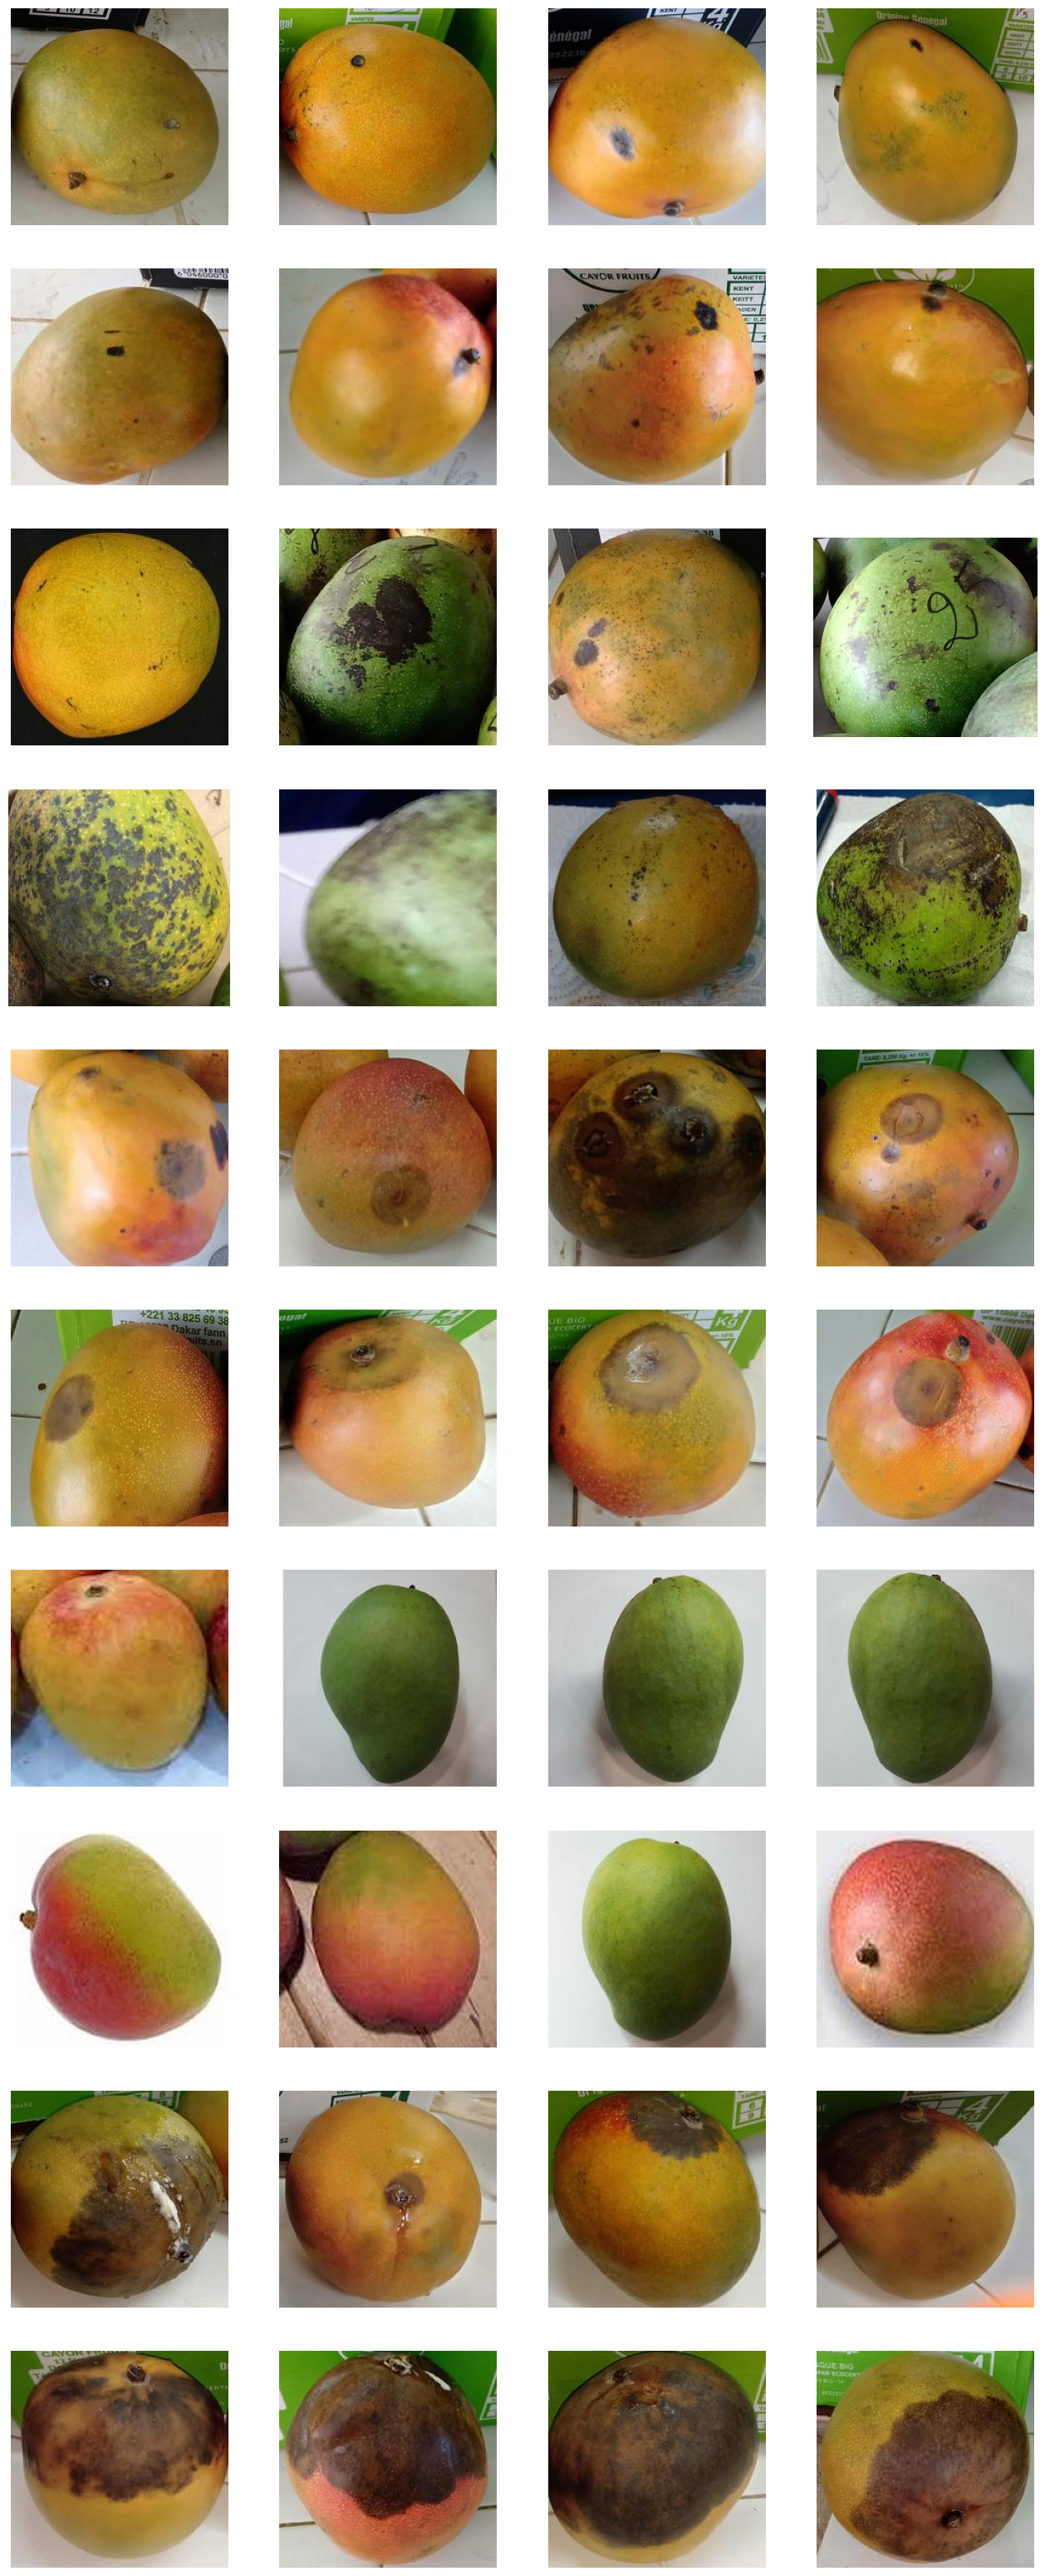

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]
c_pix = [os.path.join(c_dir, fname)
                for fname in c_names[pic_index-8:pic_index]]
d_pix = [os.path.join(d_dir, fname)
                for fname in d_names[pic_index-8:pic_index]]
e_pix = [os.path.join(e_dir, fname)
                for fname in e_names[pic_index-8:pic_index]]

for i, img_path in enumerate(a_pix + b_pix + c_pix + d_pix + e_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [9]:
from sklearn.model_selection import train_test_split
data_dir = '/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_original'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
len(train_image_paths),len(test_image_paths), len(train_labels), len(test_labels)

(689, 173, 689, 173)

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_image_paths, 'label': test_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 689 validated image filenames belonging to 5 classes.
Found 173 validated image filenames belonging to 5 classes.


In [19]:
# Number of classes (adjust if different in your dataset)
num_classes = len(train_generator.class_indices)
print("Number of classes: ", num_classes)

# Load base MobileNetV2 (with pretrained ImageNet weights)
base_model = MobileNetV2(input_shape=(150,150,3),
                         include_top=False,  # exclude the original FC layers
                         weights='imagenet')

# Freeze base layers (only train new head initially)
base_model.trainable = False


Number of classes:  5
9406464/9406464 [==============================] - 1s 0us/step


In [30]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)   # helps reduce overfitting
predictions = Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [31]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)


Epoch 1/20
11/11 [==============================] - 16s 1s/step - loss: 2.7433 - accuracy: 0.1916 - val_loss: 2.0958 - val_accuracy: 0.2254
Epoch 2/20
11/11 [==============================] - 5s 422ms/step - loss: 2.4790 - accuracy: 0.2467 - val_loss: 1.9457 - val_accuracy: 0.2370
Epoch 3/20
11/11 [==============================] - 5s 418ms/step - loss: 2.3321 - accuracy: 0.2438 - val_loss: 1.8250 - val_accuracy: 0.2370
Epoch 4/20
11/11 [==============================] - 5s 447ms/step - loss: 2.2515 - accuracy: 0.2671 - val_loss: 1.7185 - val_accuracy: 0.2775
Epoch 5/20
11/11 [==============================] - 5s 416ms/step - loss: 2.1527 - accuracy: 0.2656 - val_loss: 1.6199 - val_accuracy: 0.3179
Epoch 6/20
11/11 [==============================] - 5s 429ms/step - loss: 2.1155 - accuracy: 0.2946 - val_loss: 1.5365 - val_accuracy: 0.3584
Epoch 7/20
11/11 [==============================] - 5s 408ms/step - loss: 1.9466 - accuracy: 0.3222 - val_loss: 1.4521 - val_accuracy: 0.4277
Epoch 8/

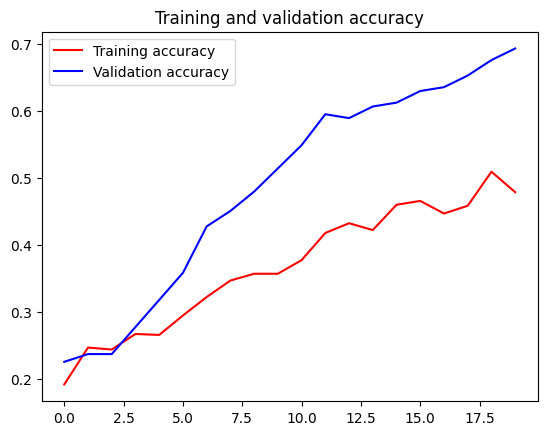

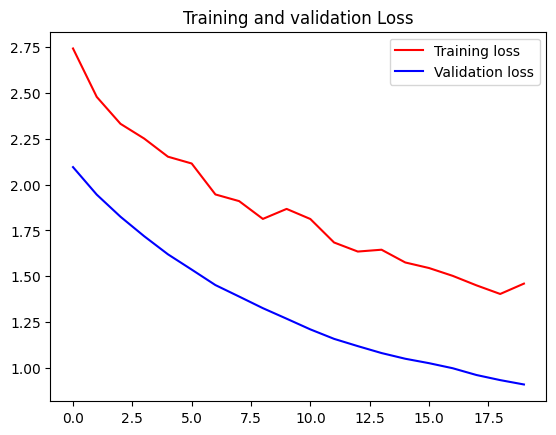

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [33]:
# Unfreeze base model
base_model.trainable = True  

# (Optional) keep early layers frozen
for layer in base_model.layers[:-30]:  
    layer.trainable = False  

# Recompile with lower LR
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again
history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=75
)


Epoch 1/75
11/11 [==============================] - 12s 457ms/step - loss: 0.5266 - accuracy: 0.7997 - val_loss: 1.0421 - val_accuracy: 0.6936
Epoch 2/75
11/11 [==============================] - 5s 429ms/step - loss: 0.5068 - accuracy: 0.8026 - val_loss: 1.0292 - val_accuracy: 0.6994
Epoch 3/75
11/11 [==============================] - 5s 423ms/step - loss: 0.4896 - accuracy: 0.8273 - val_loss: 1.0147 - val_accuracy: 0.6994
Epoch 4/75
11/11 [==============================] - 5s 409ms/step - loss: 0.4789 - accuracy: 0.8200 - val_loss: 1.0031 - val_accuracy: 0.6994
Epoch 5/75
11/11 [==============================] - 5s 415ms/step - loss: 0.5185 - accuracy: 0.8084 - val_loss: 0.9943 - val_accuracy: 0.7052
Epoch 6/75
11/11 [==============================] - 5s 411ms/step - loss: 0.4714 - accuracy: 0.8200 - val_loss: 0.9822 - val_accuracy: 0.7052
Epoch 7/75
11/11 [==============================] - 4s 401ms/step - loss: 0.4590 - accuracy: 0.8374 - val_loss: 0.9689 - val_accuracy: 0.7052
Epoch

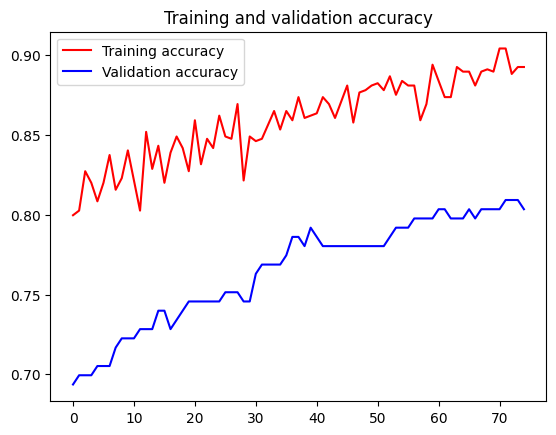

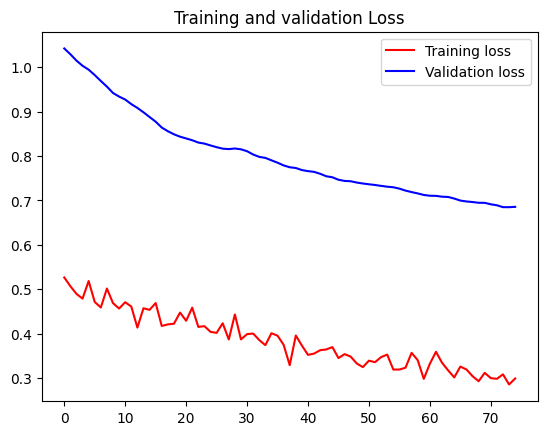

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Plot the results
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [37]:
# saving the trained model
model.save("mobilenet_mango_model.h5")

## Training model on black bg images 

In [7]:
# Directory with our training horse pictures
a_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Alternaria')

# Directory with our training human pictures
b_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Anthracnose')

# Directory with our training horse pictures
c_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Black Mould Rot')

# Directory with our training human pictures
d_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Healthy')

# Directory with our training horse pictures
e_dir = os.path.join('/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Stem and Rot')

In [8]:
a_names = os.listdir(a_dir)
print(a_names[:10])
b_names = os.listdir(b_dir)
print(b_names[:10])
c_names = os.listdir(c_dir)
print(c_names[:10])
d_names = os.listdir(d_dir)
print(d_names[:10])
e_names = os.listdir(e_dir)
print(e_names[:10])



['Alternaria_105.jpg', 'Alternaria_013.jpg', 'Alternaria_136.jpg', 'Alternaria_040.jpg', 'Alternaria_037.jpg', 'Alternaria_063.jpg', 'Alternaria_041.jpg', 'Alternaria_057.jpg', 'Alternaria_052.jpg', 'Alternaria_148.jpg']
['Anthracnose_002.jpg', 'Anthracnose_066.jpg', 'Anthracnose_057.jpg', 'Anthracnose_096.jpg', 'Anthracnose_106.jpg', 'Anthracnose_041.jpg', 'Anthracnose_040.jpg', 'Anthracnose_052.jpg', 'Anthracnose_126.jpg', 'Anthracnose_054.jpg']
['Aspergillus_065.jpg', 'Aspergillus_002.jpg', 'Aspergillus_042.jpg', 'Aspergillus_153.jpg', 'Aspergillus_028.jpg', 'Aspergillus_038.jpg', 'Aspergillus_091.jpg', 'Aspergillus_013.jpg', 'Aspergillus_106.jpg', 'Aspergillus_101.jpg']
['healthy_124.jpg', 'healthy_181.jpg', 'healthy_008.jpg', 'healthy_018.jpg', 'healthy_196.jpg', 'healthy_055.jpg', 'healthy_139.jpg', 'healthy_171.jpg', 'healthy_079.jpg', 'healthy_155.jpg']
['Lasiodiplodia_099.jpg', 'Lasiodiplodia_031.jpg', 'Lasiodiplodia_080.jpg', 'Lasiodiplodia_119.jpg', 'Lasiodiplodia_020.jpg', 

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

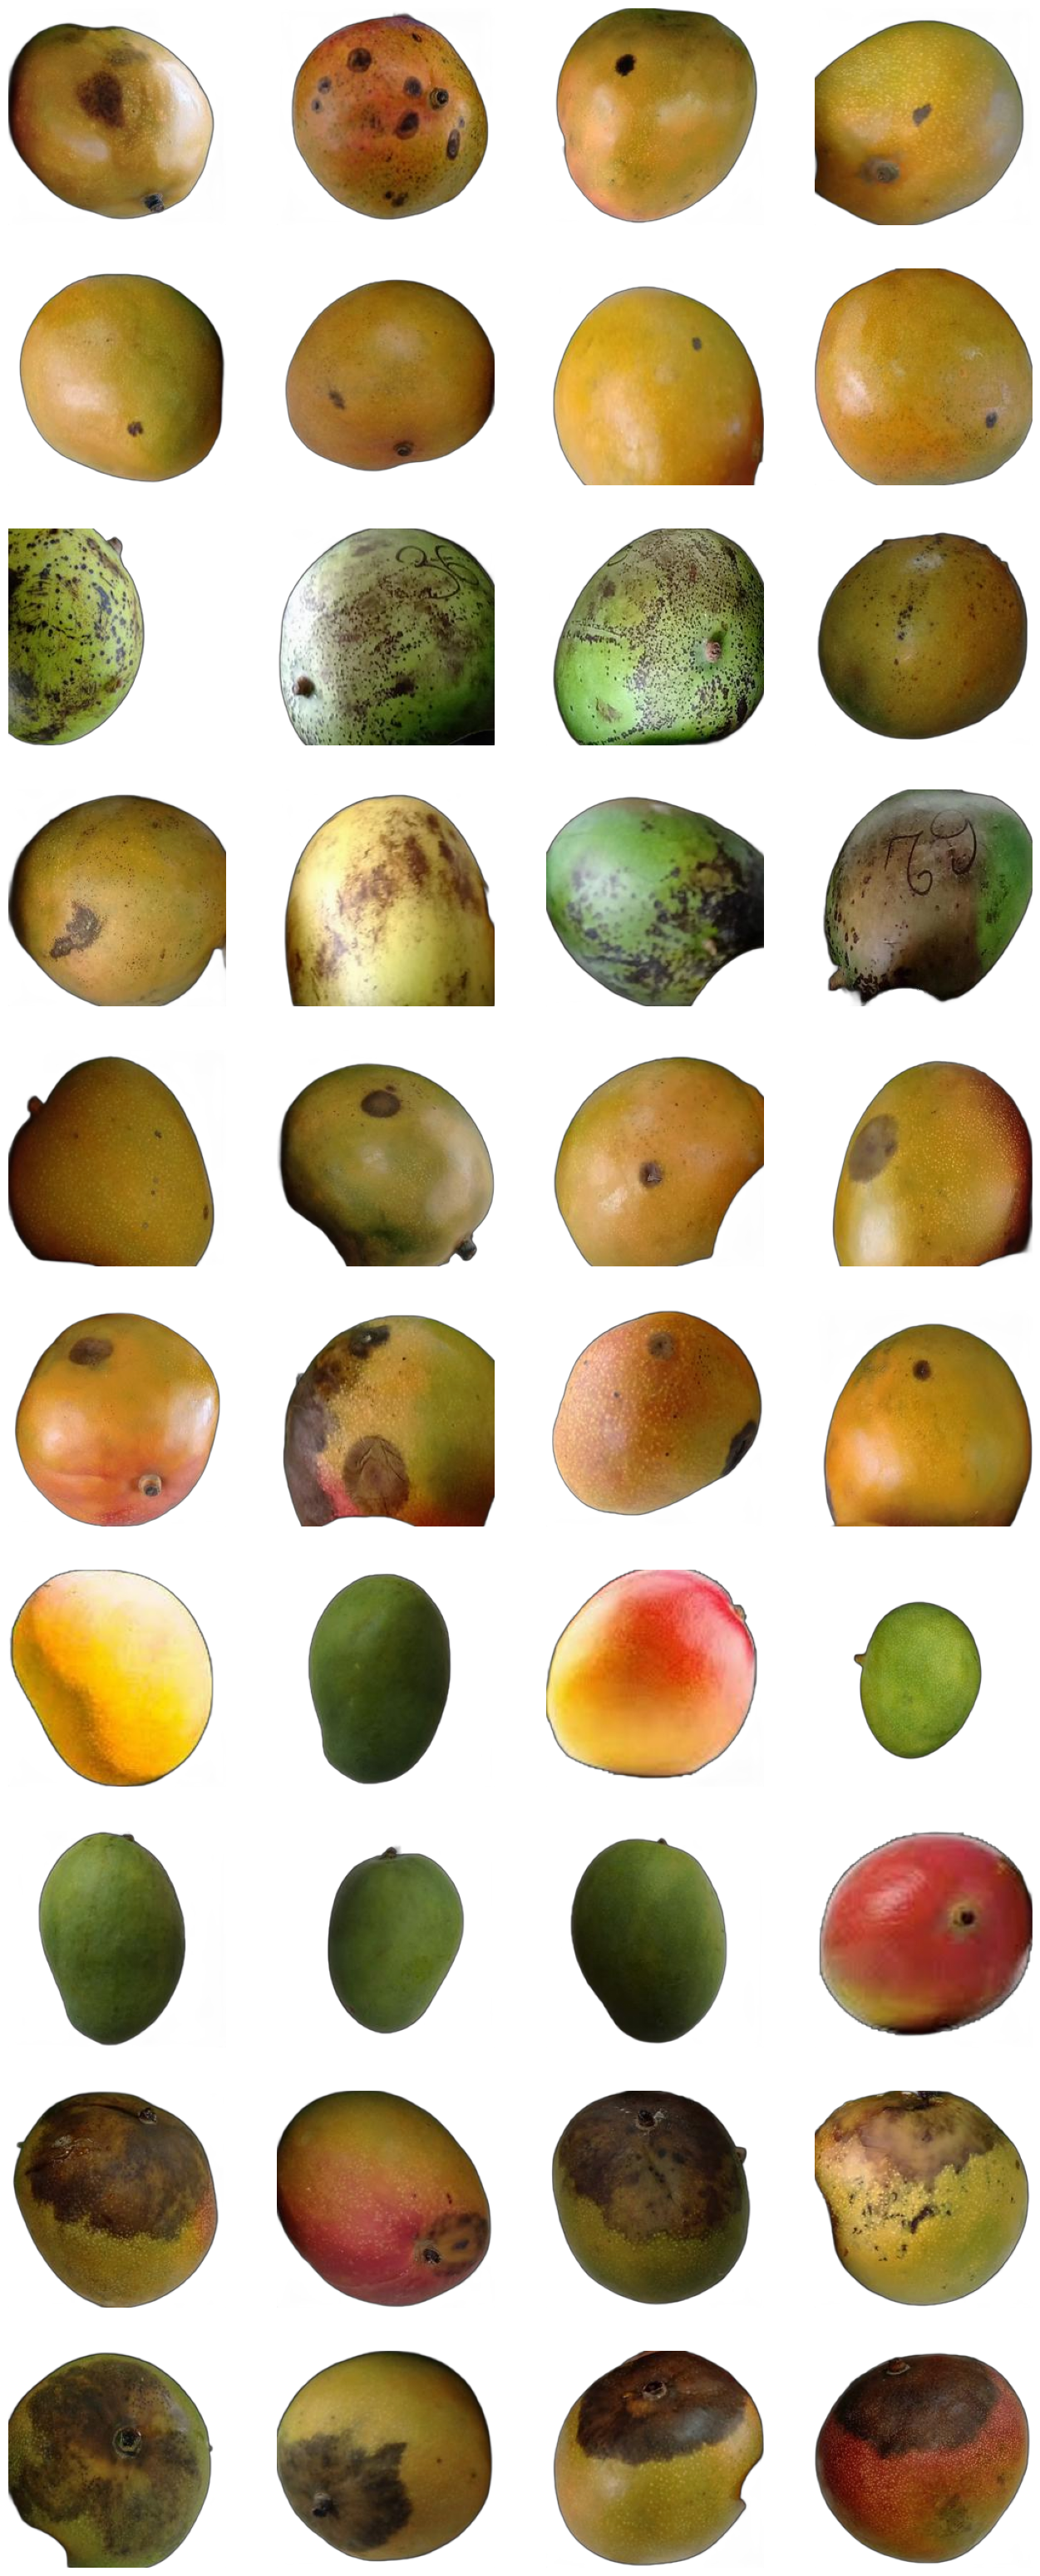

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]
c_pix = [os.path.join(c_dir, fname)
                for fname in c_names[pic_index-8:pic_index]]
d_pix = [os.path.join(d_dir, fname)
                for fname in d_names[pic_index-8:pic_index]]
e_pix = [os.path.join(e_dir, fname)
                for fname in e_names[pic_index-8:pic_index]]

for i, img_path in enumerate(a_pix + b_pix + c_pix + d_pix + e_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [14]:
from sklearn.model_selection import train_test_split
data_dir = '/kaggle/input/mangofruitdds/MangoFruitDDS/SenMangoFruitDDS_bgremoved'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, image_paths, train_labels, labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(image_paths, labels, test_size=0.5, random_state=42)


In [17]:
len(train_image_paths),len(test_paths), len(train_labels), len(test_labels), len(val_paths), len(val_labels)

(670, 84, 670, 84, 84, 84)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': val_paths, 'label': val_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_paths, 'label': test_labels}),
    x_col = 'image_path',
    y_col = 'label',
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'categorical',
    shuffle=False
)

Found 670 validated image filenames belonging to 5 classes.
Found 84 validated image filenames belonging to 5 classes.
Found 84 validated image filenames belonging to 5 classes.


In [23]:
num_classes = len(train_generator.class_indices)
print("Number of classes: ", num_classes)

# Load base MobileNetV2 (with pretrained ImageNet weights)
base_model = MobileNetV2(input_shape=(150,150,3),
                         include_top=False,  # exclude the original FC layers
                         weights='imagenet')

# Freeze base layers (only train new head initially)
base_model.trainable = False

Number of classes:  5
9406464/9406464 [==============================] - 1s 0us/step


In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)   # helps reduce overfitting
predictions = Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [25]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
base_model.trainable = True  

# (Optional) keep early layers frozen
for layer in base_model.layers[:-30]:  
    layer.trainable = False  

# Recompile with lower LR
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again
history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=75
)

Epoch 1/75
11/11 [==============================] - 20s 934ms/step - loss: 2.2192 - accuracy: 0.2104 - val_loss: 2.5210 - val_accuracy: 0.2500
Epoch 2/75
11/11 [==============================] - 6s 539ms/step - loss: 2.0179 - accuracy: 0.2478 - val_loss: 2.3451 - val_accuracy: 0.2738
Epoch 3/75
11/11 [==============================] - 6s 571ms/step - loss: 1.8194 - accuracy: 0.3299 - val_loss: 2.2163 - val_accuracy: 0.2619
Epoch 4/75
11/11 [==============================] - 6s 549ms/step - loss: 1.7607 - accuracy: 0.3433 - val_loss: 2.1019 - val_accuracy: 0.2976
Epoch 5/75
11/11 [==============================] - 6s 562ms/step - loss: 1.5911 - accuracy: 0.3821 - val_loss: 2.0089 - val_accuracy: 0.3095
Epoch 6/75
11/11 [==============================] - 6s 573ms/step - loss: 1.5057 - accuracy: 0.4299 - val_loss: 1.9317 - val_accuracy: 0.3571
Epoch 7/75
11/11 [==============================] - 6s 570ms/step - loss: 1.3797 - accuracy: 0.4716 - val_loss: 1.8742 - val_accuracy: 0.3571
Epoch

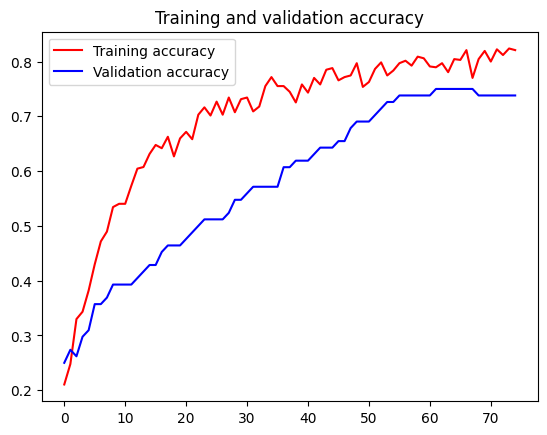

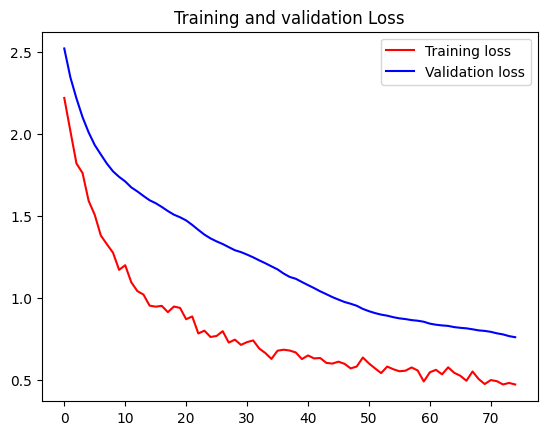

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Plot the results
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

2/2 [==============================] - 0s 162ms/step - loss: 0.5722 - accuracy: 0.7619
Test Loss: 0.5722
Test Accuracy: 0.7619


In [30]:
import numpy as np

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


2/2 [==============================] - 1s 66ms/step


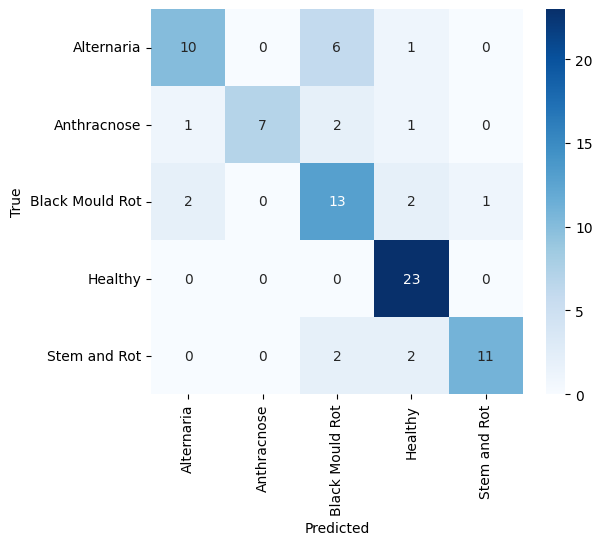

                 precision    recall  f1-score   support

     Alternaria       0.77      0.59      0.67        17
    Anthracnose       1.00      0.64      0.78        11
Black Mould Rot       0.57      0.72      0.63        18
        Healthy       0.79      1.00      0.88        23
   Stem and Rot       0.92      0.73      0.81        15

       accuracy                           0.76        84
      macro avg       0.81      0.74      0.76        84
   weighted avg       0.79      0.76      0.76        84



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


In [32]:
model.save("mobilenet_mango_model_bgremoved.h5")